In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.shape

(2000, 65)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Component1_fraction    2000 non-null   float64
 1   Component2_fraction    2000 non-null   float64
 2   Component3_fraction    2000 non-null   float64
 3   Component4_fraction    2000 non-null   float64
 4   Component5_fraction    2000 non-null   float64
 5   Component1_Property1   2000 non-null   float64
 6   Component2_Property1   2000 non-null   float64
 7   Component3_Property1   2000 non-null   float64
 8   Component4_Property1   2000 non-null   float64
 9   Component5_Property1   2000 non-null   float64
 10  Component1_Property2   2000 non-null   float64
 11  Component2_Property2   2000 non-null   float64
 12  Component3_Property2   2000 non-null   float64
 13  Component4_Property2   2000 non-null   float64
 14  Component5_Property2   2000 non-null   float64
 15  Comp

In [7]:
df.head()


,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


### checking missing values if any

In [8]:
df.isnull().sum()

Component1_fraction    0
Component2_fraction    0
Component3_fraction    0
Component4_fraction    0
Component5_fraction    0
                      ..
BlendProperty6         0
BlendProperty7         0
BlendProperty8         0
BlendProperty9         0
BlendProperty10        0
Length: 65, dtype: int64

In [9]:
df.duplicated().sum()
# checking for duplicate values. found none


np.int64(0)

In [10]:
## checkign correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

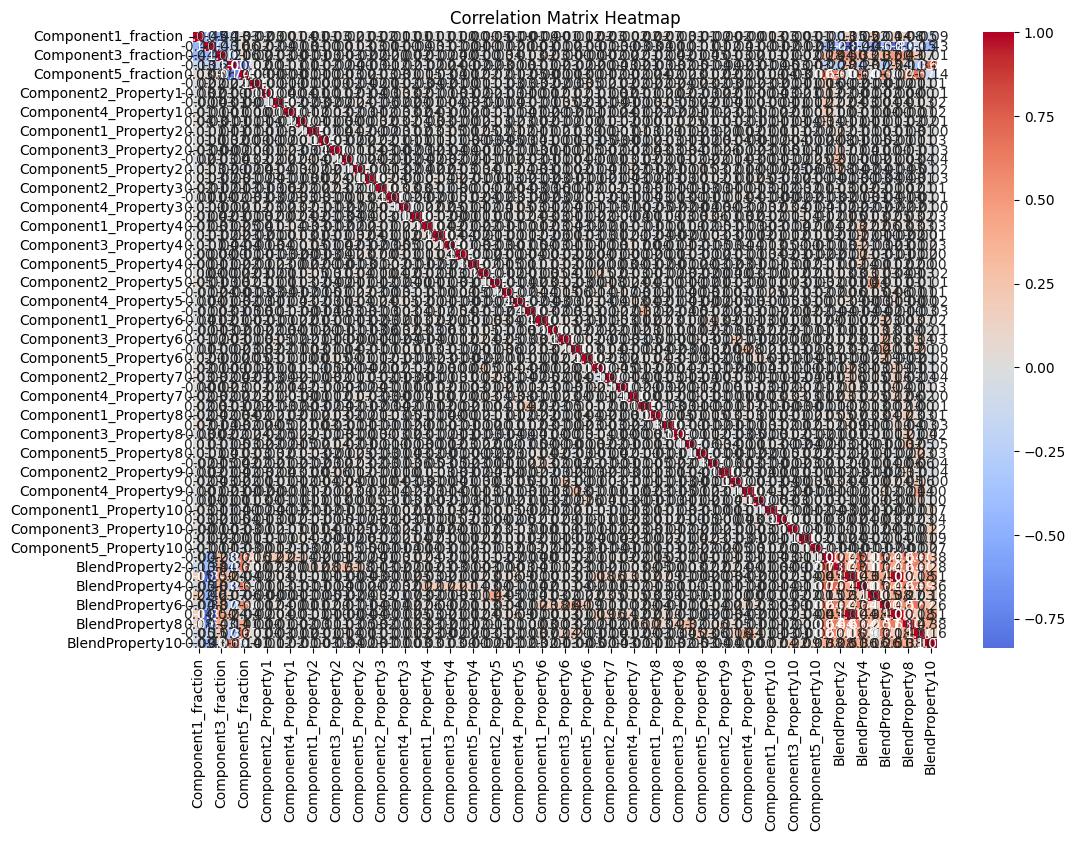

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [12]:
def get_high_correlations(corr_matrix, threshold=0.85):
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))
    return sorted(high_corr, key=lambda x: -abs(x[2]))

high_corr_pairs = get_high_correlations(df.corr(), threshold=0.85)
for f1, f2, corr_val in high_corr_pairs:
    print(f"{f1} and {f2} → Correlation = {corr_val:.2f}")



BlendProperty7 and BlendProperty3 → Correlation = 1.00


### from the above result 

##### BlendProperty7 and BlendProperty3 → Correlation = 1.00

In [1]:
# from pandas.plotting import scatter_matrix

# # take only features, dont take blend property
# only_features = df.drop(columns=['BlendProperty1', 'BlendProperty2', 'BlendProperty3', 'BlendProperty4', 'BlendProperty5', 'BlendProperty6', 'BlendProperty7', 'BlendProperty8', 'BlendProperty9', 'BlendProperty10'])
# scatter_matrix(only_features, figsize=(12, 12), diagonal='kde')
# plt.suptitle("Scatter Matrix of Features")